As a kid, I was obsessed with those data science driven "which celebrity are you?" quizzes. However, as an Asian American kid, I was simply always matched with the one or two Asian actresses included in the dataset, out of hundreds of other actresses and actors. This is a passion project to rectify that experience to the kid in me :)

Welcome to the "What celebrity are you?", East Asian edition! I pulled 10 of the A100 Honorees (100 Asian Pacific Leaders who made the greatest impact on culture and society over the past year, read more [here.](https://goldhouse.org/a100/)). This will take an image of yourself, and return which of the 10 figures you look most similar to (in a CNN's eyes)!

In [ ]:
import gc
from google.colab import drive
drive.mount('/content/gdrive')
import os
!pwd
#create folder called 545 in your drive, drop the "US_Accidents_Dec20.csv" file in there
#os.chdir("gdrive/MyDrive/Personal_Project")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


##Using Bing Image Downloader to Create Dataset

In [ ]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

In [ ]:
downloader.download('Shohei Ohtani',
                    output_dir= 'celebs/train',
                    limit = 100, adult_filter_off = False, force_replace = False, timeout = 100)

[%] Downloading Images to /content/gdrive/MyDrive/Personal_Project/celebs/train/Shohei Ohtani


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://images2.minutemediacdn.com/image/fetch/w_2000,h_2000,c_fit/https://halohangout.com/wp-content/uploads/getty-images/2018/06/971564538.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://i2.wp.com/nypost.com/wp-content/uploads/sites/2/2020/02/shohei-ohtani.jpg?quality=90&amp;strip=all&amp;ssl=1
[%] File Downloaded !

[%] Downloading Image #3 from https://images2.minutemediacdn.com/image/fetch/w_2000,h_2000,c_fit/https://halohangout.com/wp-content/uploads/getty-images/2017/07/1011148578.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://nypost.com/wp-content/uploads/sites/2/2021/06/Shohei-Ohtani-1.jpg?quality=90&amp;strip=all&amp;w=1200
[%] File Downloaded !

[%] Downloading Image #5 from https://www.washingtonpost.com/resizer/2pSBe9cHfSJb663T0nDN9DgoNo4=/1484x0/arc-angler

In [ ]:
downloader.download('Ke Huy Quan',
                    output_dir= 'celebs/train',
                    limit = 100, adult_filter_off = False, force_replace = False, timeout = 100)

[%] Downloading Images to /content/gdrive/MyDrive/Personal_Project/celebs/train/Ke Huy Quan


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://m.media-amazon.com/images/M/MV5BMjMwNTQyMzY2NF5BMl5BanBnXkFtZTcwMzQwNDczMw@@._V1_FMjpg_UX1000_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://m.media-amazon.com/images/M/MV5BMjMwNTQyMzY2NF5BMl5BanBnXkFtZTcwMzQwNDczMw@@._V1_UY1200_CR584,0,630,1200_AL_.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.tribute.ca/news/wp-content/uploads/2019/08/Ke-Huy-Quan.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.b.wikiage.org/wp-content/uploads/2021/05/Ke-Huy-Quan-Biography-Height-Life-Story.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://br.web.img2.acsta.net/pictures/21/01/12/19/00/3219845.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://media.gq.com/photos/625054e2be8b7ed25392be62/16:9/w_2560%2Cc_limit/1387390432
[%] Fil

In [ ]:
#excluding Shohei and Ke Huy Quan,
all_people = ['Sandra Oh', 'Ali Wong', 'Steven Yeun', 'Ashley Park',
              'Stephanie Hsu', 'Eileen Gu', 'Jackson Wang','Yuta Watanabe']
#starting with 10 celebrities!

In [ ]:
for i in all_people:
  downloader.download(i,
                      output_dir= 'celebs/train',
                      limit = 100, adult_filter_off = False, force_replace = False, timeout = 100)

Streaming output truncated to the last 5000 lines.
[%] Downloading Image #42 from http://akns-images.eonline.com/eol_images/Entire_Site/2016829/rs_1024x759-160929094058-1024-sandra-oh-abc.jpg
[%] File Downloaded !

[%] Downloading Image #43 from http://images2.fanpop.com/images/photos/3200000/Sandra-Oh-sandra-oh-3246466-2048-2560.jpg
[%] File Downloaded !

[%] Downloading Image #44 from http://1.bp.blogspot.com/-KLqMfo8mQ7s/URWB1m5mjjI/AAAAAAADwuM/vOwaR18XQW0/s1600/Sandra_Oh_Photo2.jpg
[%] File Downloaded !

[%] Downloading Image #45 from http://images2.fanpop.com/images/photos/3200000/Sandra-Oh-sandra-oh-3246523-1794-2560.jpg
[%] File Downloaded !

[%] Downloading Image #46 from http://www.aceshowbiz.com/images/wennpic/sandra-oh-44th-naacp-image-awards-01.jpg
[%] File Downloaded !

[%] Downloading Image #47 from http://images2.fanpop.com/images/photos/3200000/Sandra-Oh-sandra-oh-3246563-1707-2560.jpg
[%] File Downloaded !

[%] Downloading Image #48 from https://upload.wikimedia.org/wi

## Data Preprocessing

Faces with 2 eyes are extracted using Haar cascade. Manually discarded photos with 2 or more faces, blurriness, wrong person, or other blemishes.

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

face_cascade = cv2.CascadeClassifier("gdrive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("gdrive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_eye.xml")

Checking to see if CascadeClassifier works:

array([[290, 145, 193, 193]], dtype=int32)

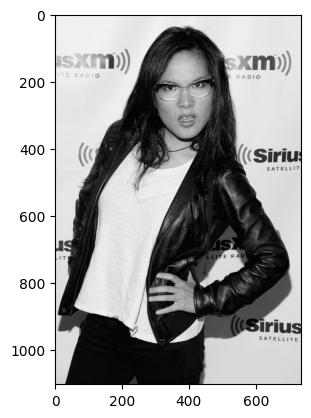

In [ ]:
#gdrive/MyDrive/Personal_Project
img = cv2.imread('gdrive/MyDrive/Personal_Project/celebs/train/Ali Wong/Image_8.jpg')
#img.shape
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap='gray')

face_cascade = cv2.CascadeClassifier('gdrive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('gdrive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray)
faces

In [ ]:
#'gdrive/MyDrive/Personal_Project/celebs/train/Ali Wong/Image_8.jpg')

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

path_to_data = "gdrive/My Drive/Personal_Project/celebs/train/"
path_to_cr_data = "gdrive/My Drive/Personal_Project/celebs/cropped/"

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder) #Checking whether the code is running successfully or not

            cropped_file_name = celebrity_name + str(count) + ".png" #changing file type of every image to png
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Shohei Ohtani
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Shohei Ohtani
Ke Huy Quan
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Ke Huy Quan
Sandra Oh
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Sandra Oh
Ali Wong
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Ali Wong
Steven Yeun
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Steven Yeun
Ashley Park
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Ashley Park


error: ignored

In [ ]:
for img_dir in img_dirs[6:]:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder) #Checking whether the code is running successfully or not

            cropped_file_name = celebrity_name + str(count) + ".png" #changing file type of every image to png
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Stephanie Hsu
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Stephanie Hsu
Eileen Gu
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Eileen Gu
Jackson Wang
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Jackson Wang
Yuta Watanabe
Generating cropped images in folder:  gdrive/My Drive/Personal_Project/celebs/cropped/Yuta Watanabe


## Feature Extraction using Wavelet Transform

Transforming Images to black and white, using wavelet transformations to extract features from images. Uses PYWT (pi wavelet transofmr library).

In [ ]:
import numpy as np
import pywt
import cv2
def w2d(img, mode='haar', level=1):
 imArray = img
 #Datatype conversions
 #convert to grayscale
 imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
 #convert to float
 imArray =  np.float32(imArray)
 imArray /= 255;
 # compute coefficients
 coeffs=pywt.wavedec2(imArray, mode, level=level)
 #Process Coefficients
 coeffs_H=list(coeffs)
 coeffs_H[0] *= 0;
 # reconstruction
 imArray_H=pywt.waverec2(coeffs_H, mode);
 imArray_H *= 255;
 imArray_H =  np.uint8(imArray_H)
 return imArray_H

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Shohei Ohtani': 0,
 'Ke Huy Quan': 1,
 'Sandra Oh': 2,
 'Ali Wong': 3,
 'Steven Yeun': 4,
 'Ashley Park': 5,
 'Stephanie Hsu': 6,
 'Eileen Gu': 7,
 'Jackson Wang': 8,
 'Yuta Watanabe': 9}

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32)) #resizing using openCV as images maybe of different sizes
        img_har = w2d(img,'db1',5) #getting the wavelet transformed image
        scalled_img_har = cv2.resize(img_har, (32, 32)) #resizing wavelet transformed image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically stacking both the images
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
X = np.array(X).reshape(len(X),4096).astype(float)

## Using SVM for heuristic finetuning

Use SVM to initially train the main model. Use GridSearch to test the other models, tuning hyperparameters.

Candidate Models:

*   SVM with parameters as — Values of C are 1,10,100,1000 and Kernel Values are rbf and linear.
*   Random Forest with parameters as — Number of estimators (or Decision Trees) as 1,5,10.
*   Logistic Regression with parameters as — Values of C are 1,5,10.






In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Pipeline is created to scale the Data.
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7935483870967742

Accuracy is 80.7%, which isn't bad for around 30-80 cropped images per person.

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.70      0.78      0.74         9
           2       0.76      0.80      0.78        20
           3       0.85      0.94      0.89        18
           4       0.86      0.82      0.84        22
           5       0.86      0.90      0.88        20
           6       0.88      0.88      0.88        24
           7       0.62      0.42      0.50        12
           8       0.80      0.92      0.86        13
           9       0.86      0.60      0.71        10

    accuracy                           0.81       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.81      0.81      0.80       156



In [ ]:
class_dict

{'Shohei Ohtani': 0,
 'Ke Huy Quan': 1,
 'Sandra Oh': 2,
 'Ali Wong': 3,
 'Steven Yeun': 4,
 'Ashley Park': 5,
 'Stephanie Hsu': 6,
 'Eileen Gu': 7,
 'Jackson Wang': 8,
 'Yuta Watanabe': 9}

Shohei and Eileen Gu have the lowest precision. This is likely due to them having the lowest amount of images, as many of their images are action shots where their eyes are covered (baseball hat or snowboard goggles). Otherwise, the model has an accuracy of around 70-88%.

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    # cv=5 => There will be 5 folds of testing the model and
    # then will avereage out the scores
    clf.fit(X_train, y_train)
    # Scores are appended and a data frame is created from it
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                  svm    0.781080   
1        random_forest    0.547312   
2  logistic_regression    0.785427   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 5}

SVM and Logistic Rgression perform with around 78% accuracy, and Random Forest performs a bit better than average.

In [ ]:
print(best_estimators['svm'].score(X_test,y_test))
print(best_estimators['random_forest'].score(X_test,y_test))
print(best_estimators['logistic_regression'].score(X_test,y_test))

0.8141025641025641
0.5576923076923077
0.782051282051282


The best SVM estimator has 81% accuracy on the testing data, so we will use that.

In [ ]:
best_clf = best_estimators['svm']

Text(95.72222222222221, 0.5, 'Truth')

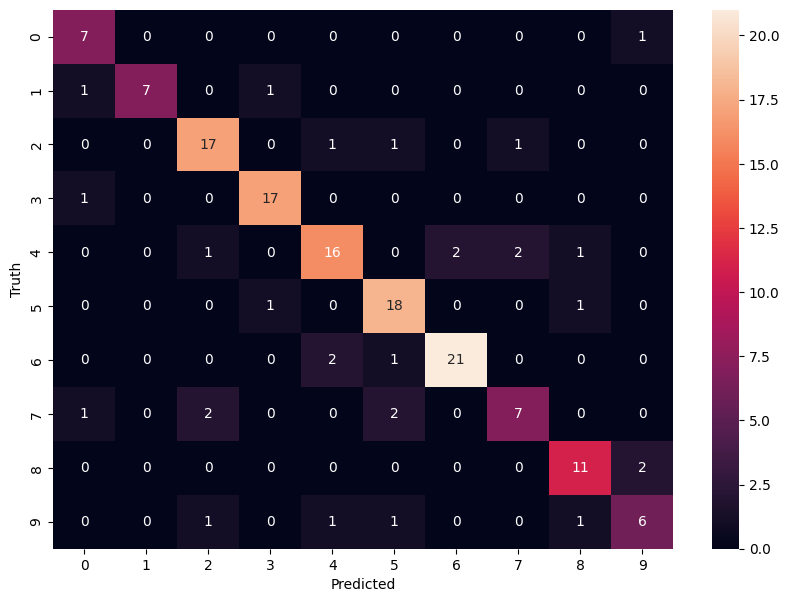

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

Implementing User Inputted Images

array([[ 520,  563, 1269, 1269],
       [1500, 2433,   70,   70]], dtype=int32)

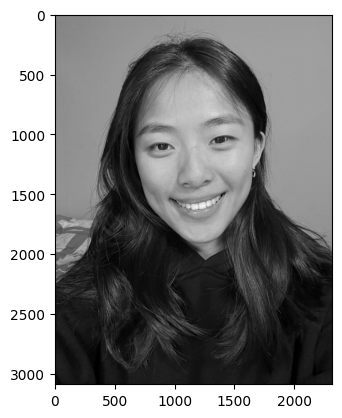

In [ ]:
#gdrive/MyDrive/Personal_Project
img = cv2.imread('gdrive/MyDrive/Personal_Project/celebs/user/IMG_8112.jpeg')
#img.shape
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap='gray')

face_cascade = cv2.CascadeClassifier('gdrive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('gdrive/MyDrive/Colab Notebooks/opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray)
faces

In [ ]:
filename = 'IMG_8112.jpeg'

In [ ]:
path_to_data_user = "gdrive/My Drive/Personal_Project/celebs/user/"
#path_to_cr_data_user = "gdrive/My Drive/Personal_Project/celebs/user_cropped/"

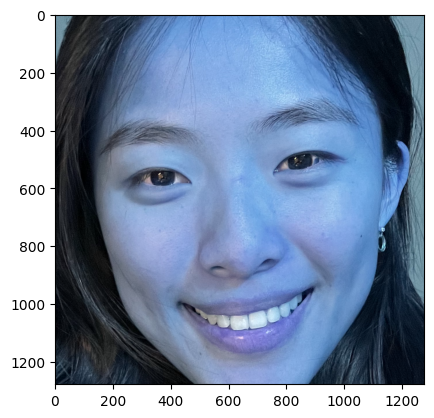

In [ ]:
filepath = path_to_data_user + filename
cropped_image = get_cropped_image_if_2_eyes(filepath)
plt.imshow(cropped_image)

In [ ]:
filepath = path_to_data_user + filename
img = cv2.imread(filepath)
scalled_raw_img = cv2.resize(img, (32, 32)) #resizing using openCV as images maybe of different sizes
img_har = w2d(img,'db1',5) #getting the wavelet transformed image
scalled_img_har = cv2.resize(img_har, (32, 32)) #resizing wavelet transformed image
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically stacking both the images

In [ ]:
best_clf.predict(combined_img.reshape(1, 4096))

array([7])

In [ ]:
X_user = [combined_img]
X_user = np.array(X_user).reshape(len(X_user),4096).astype(float)

In [ ]:
(combined_img).reshape(-1,1)

array([[103],
       [134],
       [149],
       ...,
       [191],
       [ 67],
       [150]], dtype=uint8)

In [ ]:
print(X_user)

[[103. 134. 149. ... 191.  67. 150.]]


In [ ]:
X_val = X_user[0]

In [ ]:
y_res = best_clf.predict(X_user)

In [ ]:
y_res

array([7])

In [ ]:
list(class_dict.keys())[list(class_dict.values()).index(y_res[0])]

'Eileen Gu'

Result is that I am most similar to Eileen Gu!

In [ ]:
def who_am_i(filename):
  path_to_data_user = "gdrive/My Drive/Personal_Project/celebs/user/"
  filepath = path_to_data_user + filename
  cropped_image = get_cropped_image_if_2_eyes(filepath)
  plt.imshow(cropped_image)
  img = cropped_image
  if img is None:
    return "Sorry, could not read image!"
  scalled_raw_img = cv2.resize(img, (32, 32)) #resizing using openCV as images maybe of different sizes
  img_har = w2d(img,'db1',5) #getting the wavelet transformed image
  scalled_img_har = cv2.resize(img_har, (32, 32)) #resizing wavelet transformed image
  combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically stacking both the images
  X_user = [combined_img]
  X_user = np.array(X_user).reshape(len(X_user),4096).astype(float)
  X_val = X_user[0]
  y_res = best_clf.predict(X_user)
  y = list(class_dict.keys())[list(class_dict.values()).index(y_res[0])]
  return 'You look like ' + y +'!'

In [ ]:
class_dict

{'Shohei Ohtani': 0,
 'Ke Huy Quan': 1,
 'Sandra Oh': 2,
 'Ali Wong': 3,
 'Steven Yeun': 4,
 'Ashley Park': 5,
 'Stephanie Hsu': 6,
 'Eileen Gu': 7,
 'Jackson Wang': 8,
 'Yuta Watanabe': 9}

'You look like Shohei Ohtani!'

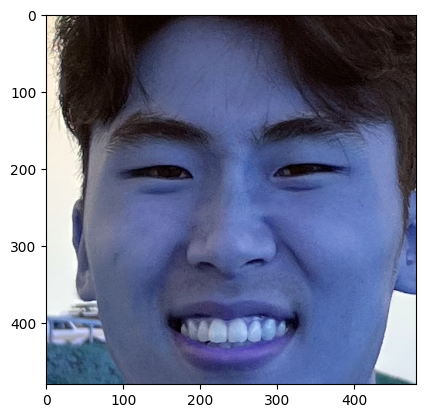

In [ ]:
who_am_i('david1.jpeg')

'You look like Eileen Gu!'

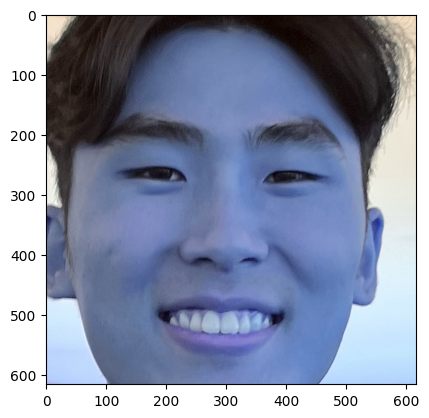

In [ ]:
who_am_i('david2.jpeg')

'You look like Ke Huy Quan!'

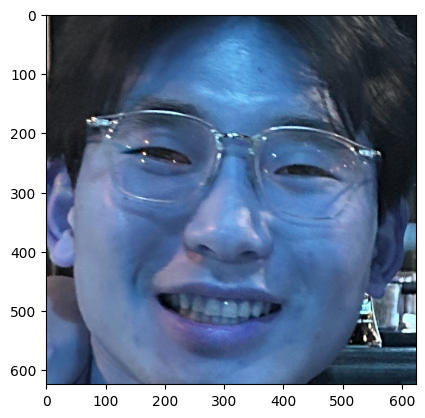

In [ ]:
who_am_i('dandn.jpeg')

'You look like Ke Huy Quan!'

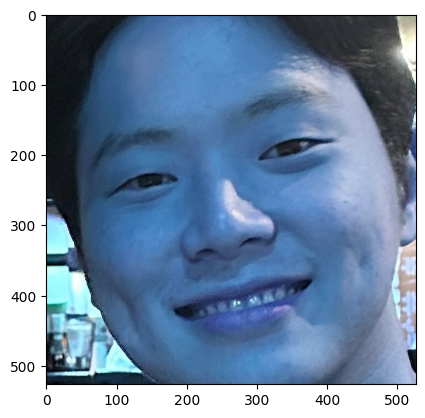

In [ ]:
who_am_i('davids.jpeg')

'You look like Stephanie Hsu!'

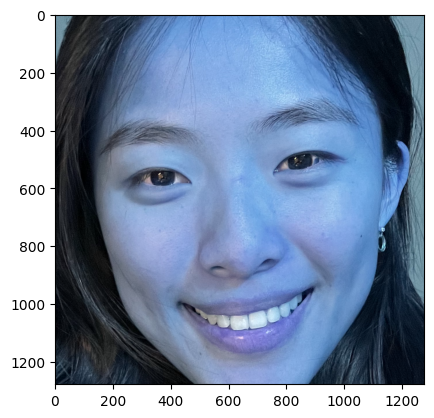

In [ ]:
who_am_i('IMG_8112.jpeg')

'You look like Stephanie Hsu!'

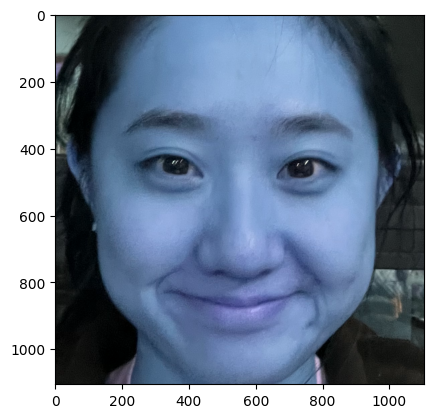

In [ ]:
who_am_i('kisha.jpeg')

'You look like Sandra Oh!'

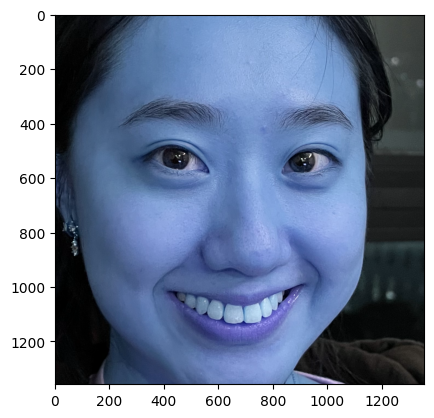

In [ ]:
who_am_i('kisha2.jpeg')

'You look like Jackson Wang!'

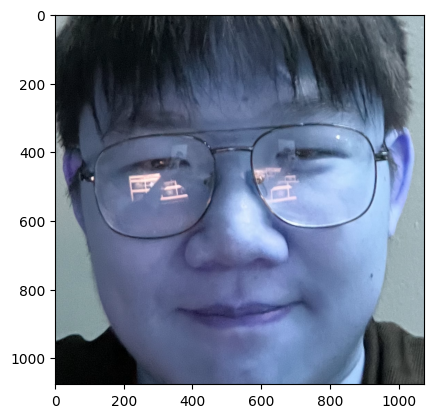

In [ ]:
who_am_i('hansen.jpeg')

'You look like Eileen Gu!'

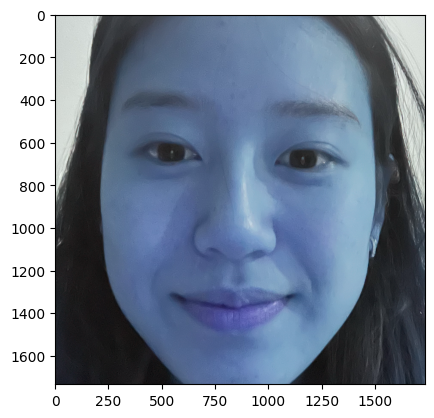

In [ ]:
who_am_i('amy2.jpeg')

'You look like Sandra Oh!'

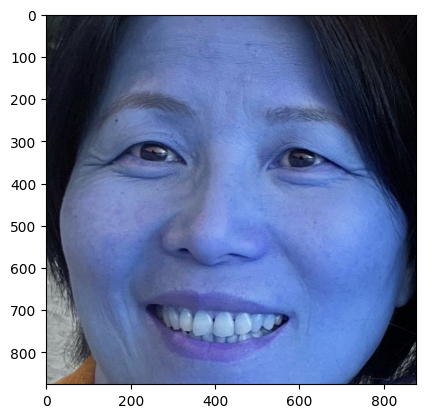

In [ ]:
who_am_i('mom.jpeg')

'You look like Steven Yeun!'

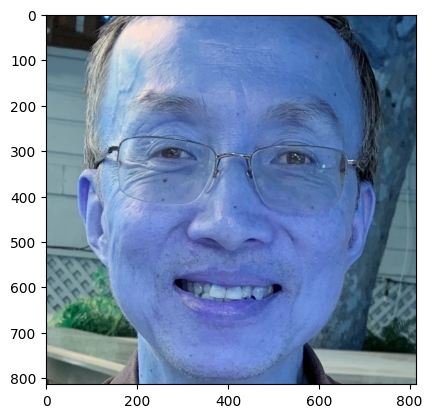

In [ ]:
who_am_i('dad.jpeg')

'You look like Ali Wong!'

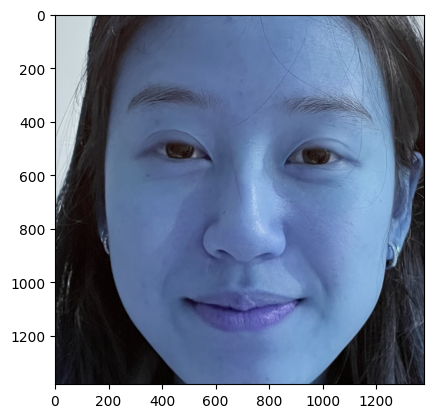

In [ ]:
who_am_i('amy.jpeg')

'You look like Steven Yeun!'

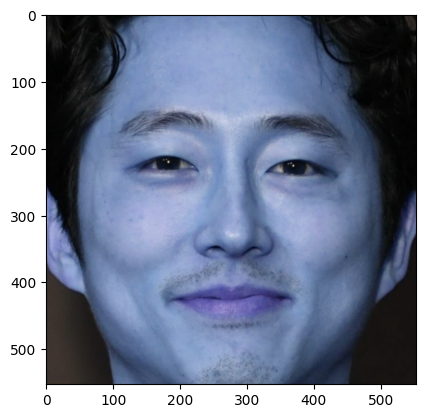

In [ ]:
who_am_i('steven.jpeg')

'You look like Ke Huy Quan!'

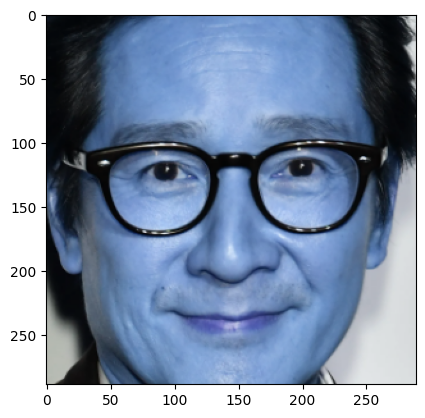

In [ ]:
who_am_i('ke.jpeg')

'You look like Eileen Gu!'

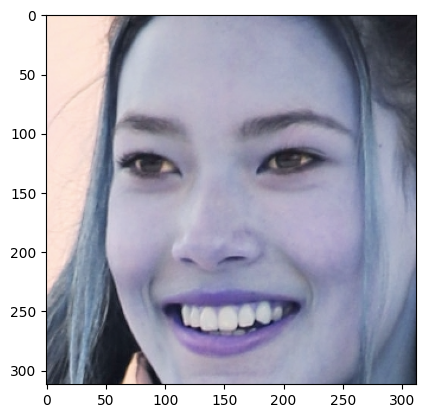

In [ ]:
who_am_i('eileen.jpeg')

'You look like Steven Yeun!'

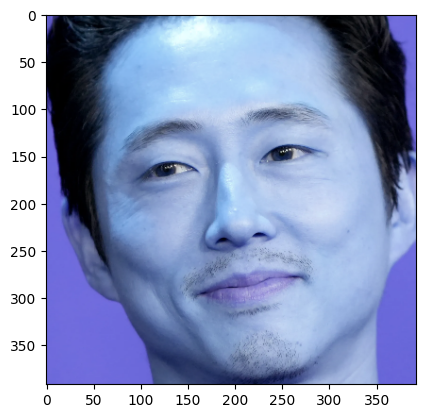

In [ ]:
who_am_i('steven2.jpeg')